# Titanic Full Analysis Project

**Variable Description**
1. **Survived:** Survived (1) or died (0); this is the target variable
2. **Pclass:** Passenger's class (1st, 2nd or 3rd class)
3. **Name:** Passenger's name
4. **Sex:** Passenger's sex
5. **Age:** Passenger's age
6. **SibSp:** Number of siblings/spouses aboard
7. **Parch:** Number of parents/children aboard
8. **Ticket:** Ticket number
9. **Fare:** Fare
10. **Cabin:** Cabin
11. **Embarked:** Port of embarkation
    * S (Southampton)
    * C (Cherbourg)
    * Q (Queenstown)

#### Import libraries

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

#### Read dataset

In [16]:
df = pd.read_csv('train.csv')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Notes:**
* We have 891 passenger on board.
* In Age column we only have 714 value that means there is missing values there.
* In Cabin we only have 204 column and that means we have lot of missing values in this column. 

## DataAnalysis

**Questions:**
1. Who were the passengers on the Titanic ?! (Age, Gender, Class, ..etc)
2. What deck were the passengers on and how does that relative to their class ?!
3. Where did the passengers come from ?!
4. Who was alone and who was with family ?!
5. What factors helped someone survive the sinking ?!

### 1. Who were the passengers on the Titanic ?! (Age, Gender, Class, ..etc)

**Let's have a look on gender**

<AxesSubplot:xlabel='Sex', ylabel='count'>

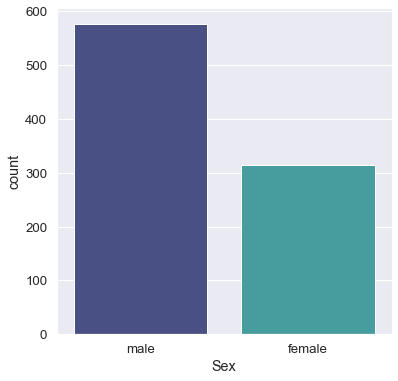

In [19]:
sns.countplot(x = 'Sex', data = df, palette = 'mako')

**Note:** From these we seem that we have much males than females. 

**Let's see No. of male and female in each class**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

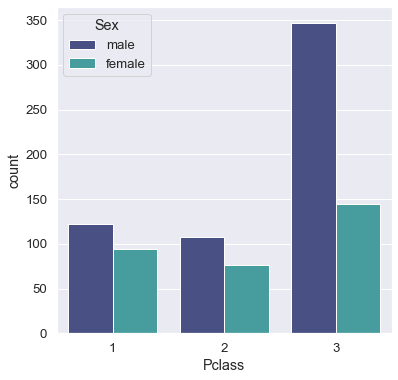

In [20]:
sns.countplot(x = 'Pclass', data = df, hue = 'Sex', palette = 'mako')

**Note:** 
* There is more males in 3rd class than females.
* Other classes No. of males and females are almost the same.

**That not enough we want to see if there is a child in the deaths or not, and see it with sex agnist class**

In [22]:
def male_female_child(passenger):
    sex, age = passenger
    if age < 16: return 'child'
    else: return sex

df['MaleFemaleChild'] = df[['Sex', 'Age']].apply(male_female_child, axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleFemaleChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


<AxesSubplot:xlabel='Pclass', ylabel='count'>

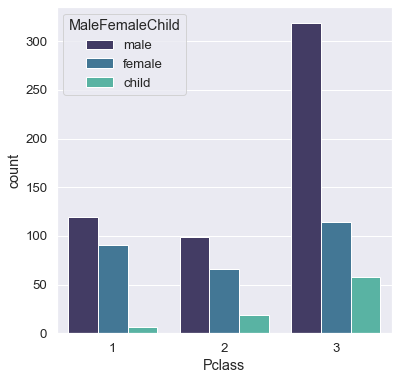

In [24]:
sns.countplot(x = 'Pclass', data = df, hue = 'MaleFemaleChild', palette = 'mako')

**Note:** We don't have that much of children in our dataset espicially on the 1st, and 2nd class.

**Let's have a look on distribution of ages**

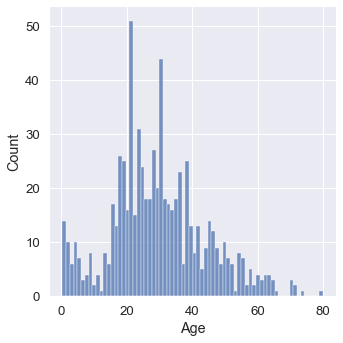

In [28]:
sns.displot(x = 'Age', data = df, palette = 'mako', bins = 70)

<AxesSubplot:xlabel='Age', ylabel='Density'>

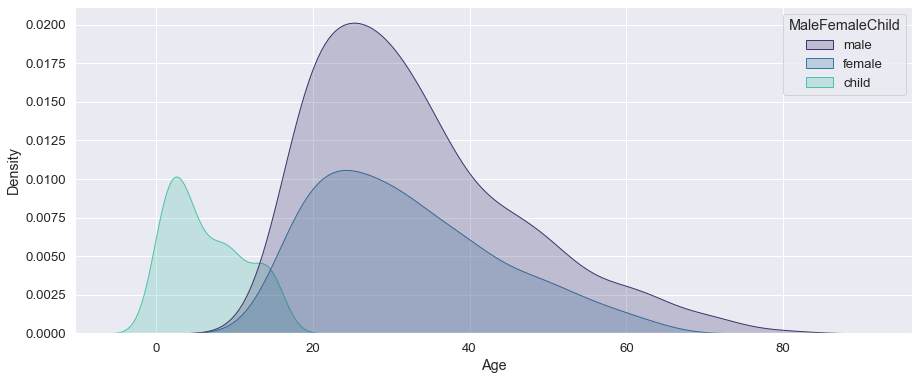

In [53]:
plt.figure(figsize = (15, 6)) 
sns.kdeplot(x = 'Age', data = df, hue = 'MaleFemaleChild', palette = 'mako', shade = True)

**Let's do the same thing on classes with age**

<AxesSubplot:xlabel='Age', ylabel='Density'>

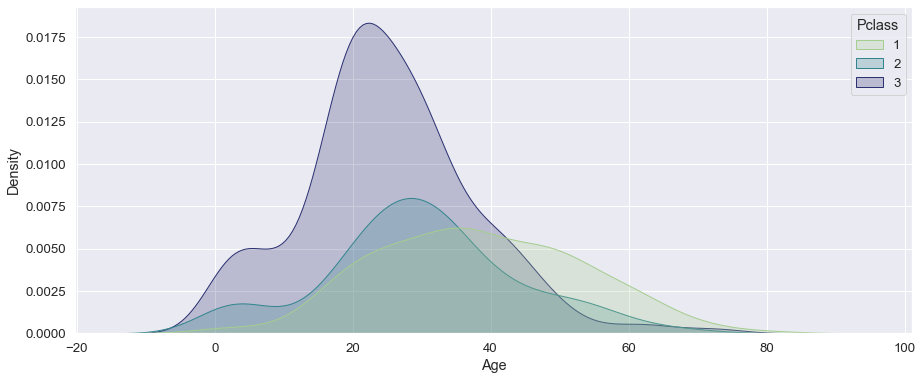

In [91]:
plt.figure(figsize = (15, 6)) 
sns.kdeplot(x = 'Age', data = df, hue = 'Pclass', palette = 'crest', shade = True)

**Note:** That ensure that 3rd class is the most valuable class

### 2. What deck were the passengers on and how does that relative to their class ?!

In [80]:
deck = df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [81]:
cabins = []
for c in deck:
    cabins.append(c[0])

cabin_df = pd.DataFrame(cabins, columns=['Cabin'])
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


In [84]:
cabin_df['Cabin'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [86]:
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']
cabin_df['Cabin'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

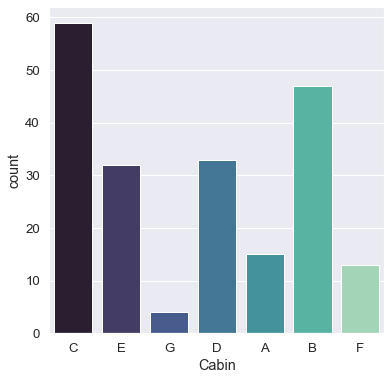

In [87]:
sns.countplot(x = 'Cabin', data = cabin_df, palette = 'mako')

### 3. Where did the passengers come from ?!

<AxesSubplot:xlabel='Embarked', ylabel='count'>

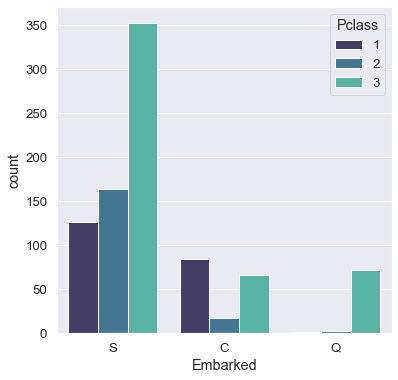

In [88]:
sns.countplot(x = 'Embarked', data = df, palette = 'mako', hue = 'Pclass')

**Notes:** 
* Lot of people from S in 3rd class, so the most common deaths come form S.

### 4. Who was alone and who was with family ?!

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleFemaleChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [94]:
df['FamilyNo'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleFemaleChild,FamilyNo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


**Note:** If family column has anything but ZERO then he is with a family.

In [96]:
def is_alone(FamilyNo):
    if FamilyNo > 0:
        return 'With Family'
    else:
        return 'Alone'
df['IsAlone'] = df['FamilyNo'].apply(is_alone)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MaleFemaleChild,FamilyNo,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,Alone


<AxesSubplot:xlabel='IsAlone', ylabel='count'>

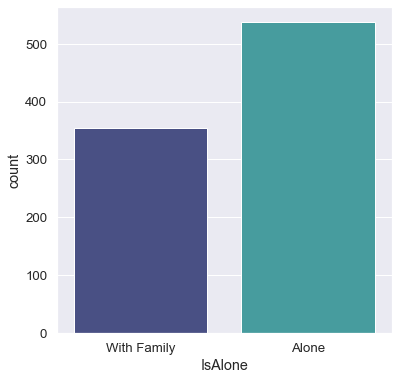

In [97]:
sns.countplot(x = 'IsAlone', data = df, palette = 'mako')

**Note:** Alone people is is more than with family people.

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

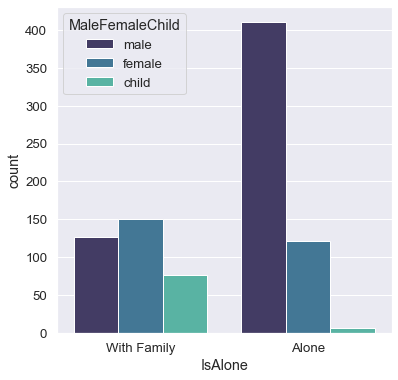

In [98]:
sns.countplot(x = 'IsAlone', data = df, hue = 'MaleFemaleChild', palette = 'mako')

**Note:** 
* Lot of males is alone.
* Almost non childern is alone.

### 5. What factors helped someone survive the sinking ?!

**Let's see if class is a factor on survival**

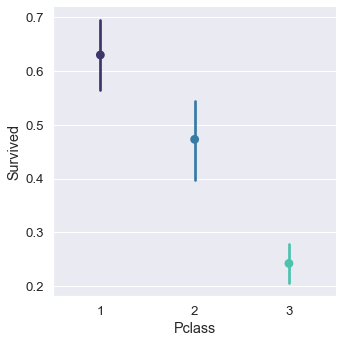

In [116]:
sns.catplot(x = 'Pclass', y = 'Survived', data = df, kind = 'point', palette = 'mako')

**Note:** That seems that 3rd class wasn't lucky to be in survival.

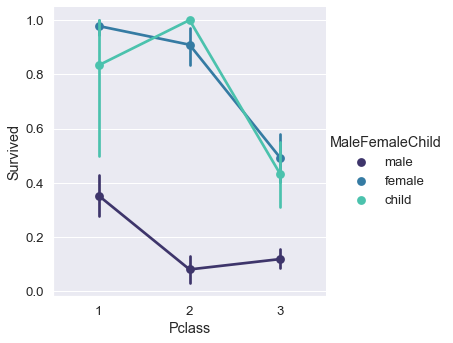

In [117]:
sns.catplot(x = 'Pclass', y = 'Survived', data = df, hue = 'MaleFemaleChild', kind = 'point', palette = 'mako')

**Note:** Males wasn't lucky, there priority for females and childern.

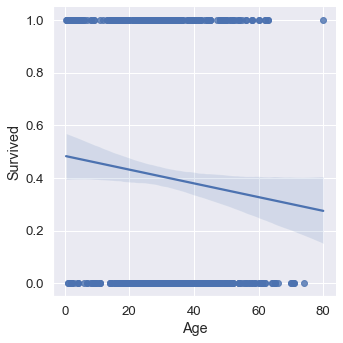

In [120]:
sns.lmplot(x = 'Age', y = 'Survived', data = df, palette = 'mako')

**Note:** The more u get older your survival chances decreases.

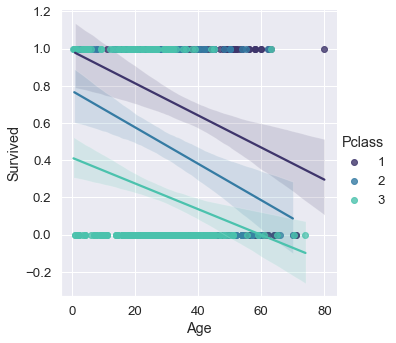

In [121]:
sns.lmplot(x = 'Age', y = 'Survived', data = df, hue = 'Pclass', palette = 'mako')

**Note:** The more u are in 1st class the more u survive, and the more u down to 3rd class the more u dead.

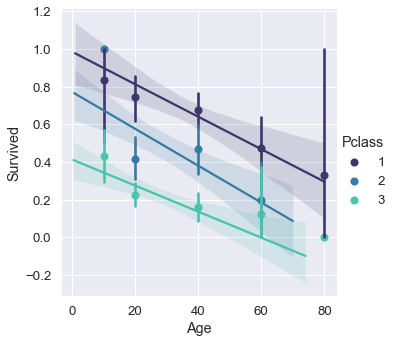

In [124]:
sns.lmplot(x = 'Age', y = 'Survived', data = df, hue = 'Pclass', palette = 'mako', x_bins = [10, 20, 40, 60, 80])

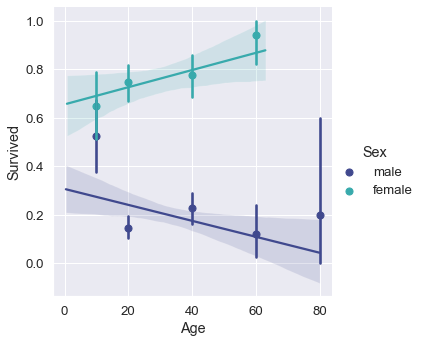

In [125]:
sns.lmplot(x = 'Age', y = 'Survived', data = df, hue = 'Sex', palette = 'mako', x_bins = [10, 20, 40, 60, 80])

**Note:** Older female has more chance in surviving than males

<AxesSubplot:xlabel='Embarked', ylabel='count'>

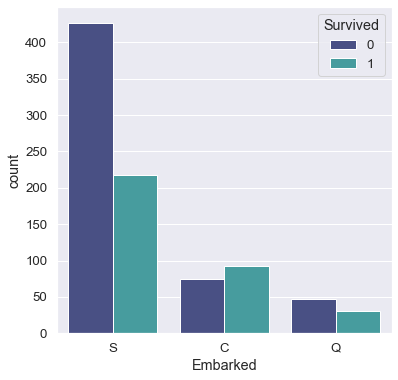

In [131]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived', palette = 'mako')

**Note:** S has much deaths.